In [1]:

!pip install PyGithub
!pip install matplotlib


In [2]:
'''
    Adarsh Anand
    * Scrape all the details of user from Github
    * Show all the repo of user(public repo)
    * Data visualization of max language used in repo
'''

import requests
from github import Github
import matplotlib.pyplot as plt

# imports
# !conda install PyGithub

# reading the Github username from the user
username = input("Enter the username: ")

url = f"https://api.github.com/users/{username}"

# to retrieve data contained in the url in json format

user_data = requests.get(url).json()
# print(user_data)

In [3]:
# Get the user's details
user = Github().get_user(username)
# Access the user data by - user.name , user.email , user.location , user.bio etc
user_details = {}
user_details["Name"] = user.name
user_details["Email"] = user.email
user_details["Location"] = user.location
user_details["Bio"] = user.bio
user_details["Public Repositories"] = user.public_repos
user_details["Followers"] = user.followers
user_details["Following"] = user.following

# print(user_details)
print("{:<20} {:<20}".format("----", "----"))
print("{:<20} {:<20}".format("Name", user_details["Name"]))
print("{:<20} {:<20}".format("Location", user_details["Location"]))
print("{:<20} {:<20}".format("Bio", user_details["Bio"]))
print("{:<20} {:<20}".format("Public Repositories",
      user_details["Public Repositories"]))
print("{:<20} {:<20}".format("Followers", user_details["Followers"]))
print("{:<20} {:<20}".format("Following", user_details["Following"]))
print("{:<20} {:<20}".format("----", "----"))


----                 ----                
Name                 Adarsh Anand        
Location             Patna               
Bio                  IIT Goa CSE Sophomore | Self-taught guy
Public Repositories  12                  
Followers            51                  
Following            98                  
----                 ----                


In [4]:
# Return list of all json objects containing repository names

def repository_names(user):
    repo_names = []
    for repo in user.get_repos():
        repo_names.append(repo)
    return repo_names

# Extracting the repository details
def repository_details(user):
    all_repo_details = []
    repo_names = repository_names(user)
    for repo in repo_names:
        repo_details = {}
        repo_details["Name"] = repo.full_name.split("/")[1]
        repo_details["Description"] = repo.description
        repo_details["Created on"] = repo.created_at
        repo_details["Programming language"] = repo.language
        repo_details["Forked"] = str(repo.forks) + " time(s)"
        # if(repo.topics):
        #     repo_details["Topics"] = repo.topics
        all_repo_details.append(repo_details)
    return all_repo_details


Repo_data = repository_details(user)
# fetching the details of all repositories
# stored as a list of dictionaries

if __name__ == "__main__":
    for content in Repo_data:
        for title, description in content.items():
            print(title, ":", description)
        print("\n------\n")


Name : AdarshAnand67
Description : None
Created on : 2021-12-19 09:06:25
Programming language : None
Forked : 0 time(s)

------

Name : Classification-Problem
Description : ML classification problem as a part of IITPKD Techfest
Created on : 2022-01-25 02:18:31
Programming language : Jupyter Notebook
Forked : 0 time(s)

------

Name : ML-ProjectKart
Description : 🙌Kart of 210+ projects based on machine learning, deep learning, computer vision, natural language processing and all. Show your support by ✨ this repository. 
Created on : 2021-12-19 09:49:45
Programming language : None
Forked : 0 time(s)

------

Name : OpenCV
Description : Common OpenCV Functions
Created on : 2022-01-03 18:20:12
Programming language : Jupyter Notebook
Forked : 0 time(s)

------

Name : OpenCV-Game-Automation
Description : OpenCV Game Automation
Created on : 2022-01-09 07:16:38
Programming language : HTML
Forked : 1 time(s)

------

Name : Pathfinding-Visualisations
Description : CS 101 Course Project (Final 

Language             Count               
----                 ----                
Jupyter Notebook     7                   
HTML                 2                   
Python               1                   


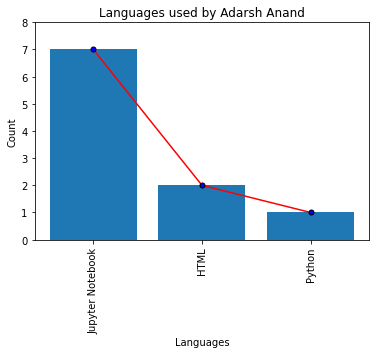

In [5]:
# Do a data analysis on language used in the repositories
languages = {}
for item in Repo_data:
    if(item["Programming language"]):
        languages[item["Programming language"]] = languages.get(
            item["Programming language"], 0) + 1

# print(languages)

# Display the language in a table
print("{:<20} {:<20}".format("Language", "Count"))
print("{:<20} {:<20}".format("----", "----"))
for name, lang in languages.items():
    print("{:<20} {:<20}".format(name, lang))


# draw a bar chart
x = list(languages.keys())
y = list(languages.values())

plt.bar(list(languages.keys()), list(languages.values()))

# Give a title to the graph
plt.title(f"Languages used by {user.name}")

# X axis label
plt.xlabel("Languages")

# Y axis label
plt.ylabel("Count")

# Rotate the x axis labels
plt.xticks(rotation=90)

# Resize y axis
plt.ylim(0, max(y)+1)

plt.plot(x, y, data=None, color='red', linestyle='-', marker='o', markersize=5,
         markerfacecolor='blue', markeredgecolor='black', markeredgewidth=1)

plt.show()
